## Mount the Google Drive onto the Colab as the storage location.

Following the instructions returned from the below cell. You will click a web link and select the google account you want to mount, then copy the authorication code to the blank, press enter.

In [1]:
# This must be run within a Google Colab environment 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Append the directory location where you upload the start code folder (In this problem, *RLalgs*) to the sys.path

E.g. dir = '/content/drive/My Drive/RL/.', start code folder is inside "RL" folder.

In [2]:
import sys
# sys.path.append('/content/gdrive/My Drive/RL/.')
sys.path.append('/content/gdrive/My Drive/EECS6885/codingAssignment/CodingAssignmentFrozenLake/')
# print(sys.path)
# sys.path.append('Users\MSI-NB\Desktop\Columbia\6885\HW3\codingAssignment\CodingAssignmentFrozenLake')

Your code should remain in the block marked by<br />
\############################<br />
\# YOUR CODE STARTS HERE<br />
\# YOUR CODE ENDS HERE<br />
\############################<br />
Please don't edit anything outside the block.

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
pip install gym==0.25.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
pip install gym[toy_text]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.3 MB 1.7 MB/s 


In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt
import gym

## 1. Incremental Implementation of Average
We've finished the incremental implementation of average for you. Please call the function estimate with 1/step step size and fixed step size to compare the difference between this two on a simulated Bandit problem.<br />


In [7]:
from RLalgs.utils import estimate
random.seed(6885)
numTimeStep = 10000
q_h = np.zeros(numTimeStep + 1) # Q Value estimate with 1/step step size
q_f = np.zeros(numTimeStep + 1) # Q value estimate with fixed step size
FixedStepSize = 0.5 #A large number to exaggerate the difference
for step in range(1, numTimeStep + 1):
    if step < numTimeStep / 2:
        r = random.gauss(mu = 1, sigma = 0.1)
    else:
        r = random.gauss(mu = 3, sigma = 0.1)
    
    #TIPS: Call function estimate defined in ./RLalgs/utils.py
    ############################
    # YOUR CODE STARTS HERE
    q_h[step] = estimate(q_h[step - 1],1/step, r)
    q_f[step] = estimate(q_f[step - 1],FixedStepSize, r)
    # YOUR CODE ENDS HERE
    ############################
    
q_h = q_h[1:]
q_f = q_f[1:]

RLalgs is a package containing Reinforcement Learning algorithms Epsilon-Greedy, Policy Iteration, Value Iteration, Q-Learning, and SARSA.


Plot the two Q value estimates. (Please include a title, labels on both axes, and legends)<br />

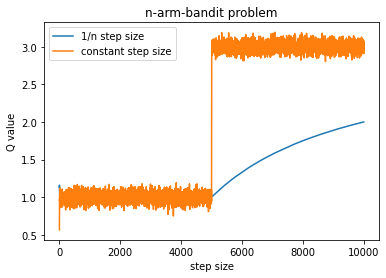

In [8]:
############################
# YOUR CODE STARTS HERE
plt.plot(q_h,label = '1/n step size')
plt.plot(q_f, label = 'constant step size')
plt.xlabel("step size")
plt.ylabel("Q value")
plt.title("n-arm-bandit problem")
plt.legend()
plt.show()
# YOUR CODE ENDS HERE
############################

## 2. $\epsilon$-Greedy for Exploration
In Reinforcement Learning, we are always faced with the dilemma of exploration and exploitation. $\epsilon$-Greedy is a trade-off between them. You are gonna implement Greedy and $\epsilon$-Greedy. We combine these two policies in one function by treating Greedy as $\epsilon$-Greedy where $\epsilon = 0$. Edit the function epsilon_greedy in ./RLalgs/utils.py.<br />


In [9]:
from RLalgs.utils import epsilon_greedy
np.random.seed(6885) #Set the seed to cancel the randomness
q = np.random.normal(0, 1, size = 5)
############################
# YOUR CODE STARTS HERE
greedy_action = epsilon_greedy(q,0) #Use epsilon = 0 for Greedy
e_greedy_action = epsilon_greedy(q,0.1) #Use epsilon = 0.1
# YOUR CODE ENDS HERE
############################
print('Values:')
print(q)
print('Greedy Choice =', greedy_action)
print('Epsilon-Greedy Choice =', e_greedy_action)

Values:
[ 0.61264537  0.27923079 -0.84600857  0.05469574 -1.09990968]
Greedy Choice = 0
Epsilon-Greedy Choice = 0


You should get the following results.<br />
Values:<br />
\[ 0.61264537  0.27923079 -0.84600857  0.05469574 -1.09990968\]<br />
Greedy Choice = 0<br />

## 3. Frozen Lake Environment 

In [10]:
env = gym.make('FrozenLake-v1',render_mode='human')

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


### 3.1 Derive Q value from V value
Edit function action_evaluation in ./RLalgs/utils.py.<br />
TIPS: $q(s, a)=\sum_{s',r}p(s',r|s,a)(r+\gamma v(s'))$<br />

In [11]:
from RLalgs.utils import action_evaluation
v = np.ones(16)
q = action_evaluation(env = env.env, gamma = 1, v = v)
print('Action values:')
print(q)

Action values:
[[1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.33333333 1.33333333 1.33333333]
 [1.         1.         1.         1.        ]]


You should get Q values all equal to one except at State 14

Pseudo-codes of the following four algorithms can be found on Page 80, 83, 130, 131 of the Sutton's book.

### 3.2 Model-based RL algorithms

In [12]:
from RLalgs.utils import action_evaluation, action_selection, render

### 3.2.1 Policy Iteration
Edit the function policy_iteration and relevant functions in ./RLalgs/pi.py to implement the Policy Iteration Algorithm.<br />

In [13]:
from RLalgs.pi import policy_iteration
V, policy, numIterations = policy_iteration(env = env.env, gamma = 1, max_iteration = 500, theta = 1e-7)
print('State values:')
print(V)
print('Number of iterations to converge =', numIterations)

State values:
[0.82352774 0.8235272  0.82352682 0.82352662 0.82352791 0.
 0.52941063 0.         0.82352817 0.82352851 0.76470509 0.
 0.         0.88235232 0.94117615 0.        ]
Number of iterations to converge = 6


You should get values close to:<br />
State values:<br />
\[0.82352774 0.8235272  0.82352682 0.82352662 0.82352791 0.<br />
0.52941063 0.         0.82352817 0.82352851 0.76470509 0.<br />0.         0.88235232 0.94117615 0.\]

In [15]:
# Uncomment and run the following to evaluate your result, comment them when you generate the pdf
# Q = action_evaluation(env = env.env, gamma = 1, v = V)
# policy_estimate = action_selection(Q)
# print(policy_estimate)
# render(env, policy_estimate)

### 3.2.2 Value Iteration
Edit the function value_iteration and relevant functions in ./RLalgs/vi.py to implement the Value Iteration Algorithm.<br />

In [16]:
from RLalgs.vi import value_iteration
V, policy, numIterations = value_iteration(env = env.env, gamma = 1, max_iteration = 500, theta = 1e-7)
print('State values:')
print(V)
print('Number of iterations to converge =', numIterations)

State values:
[0.82352773 0.82352718 0.8235268  0.8235266  0.8235279  0.
 0.52941062 0.         0.82352816 0.8235285  0.76470509 0.
 0.         0.88235231 0.94117615 0.        ]
Number of iterations to converge = 389


You should get values close to:<br />
State values:<br />
\[0.82352773 0.82352718  0.8235268 0.8235266 0.8235279 0.<br />
0.52941062 0.         0.82352816 0.8235285 0.76470509 0.<br />0.         0.88235231 0.94117615 0.\]

In [17]:
#Uncomment and run the following to evaluate your result, comment them when you generate the pdf
# Q = action_evaluation(env = env.env, gamma = 1, v = V)
# policy_estimate = action_selection(Q)
# render(env, policy_estimate)

### 3.3 Model free RL algorithms

### 3.3.1 Q-Learning
Edit the function QLearning in ./RLalgs/ql.py to implement the Q-Learning Algorithm.<br />

In [19]:
#If running on colab run this first to avoid 'no available video device'
# import os
# os.environ["SDL_VIDEODRIVER"] = "dummy"

In [20]:
from RLalgs.ql import QLearning
Q = QLearning(env = env.env, num_episodes = 1000, gamma = 1, lr = 0.1, e = 0.1)
print('Action values:')
print(Q)

Action values:
[[9.91933745e-02 8.05388941e-02 8.32938342e-02 1.36226816e-01]
 [3.89068939e-02 7.44550999e-02 6.12516832e-02 1.42913737e-01]
 [1.67457834e-01 8.61519794e-02 7.47541190e-02 7.55744614e-02]
 [1.62569972e-03 7.12296955e-02 8.40566455e-03 1.08509309e-02]
 [1.14433339e-01 1.07373543e-03 0.00000000e+00 6.27023015e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.75693396e-01 7.54405509e-02 7.13771956e-02 1.37775899e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.46763159e-02 9.24035736e-09 1.25684295e-01 2.83639624e-02]
 [7.28495897e-03 2.70817472e-01 0.00000000e+00 4.41198251e-02]
 [3.37527698e-01 1.42013476e-01 1.43313028e-01 5.90975360e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.36420350e-06 1.35080946e-01 5.38790556e-07 3.26254874e-01]
 [2.18899236e-01 1.94291197e-01 6.50991891e-01 2.40294529e-01]
 [0.00000000e+00 0.00000000e+00 0.000000

Generally, you should get non-zero action values on non-terminal states.

In [ ]:
#Uncomment the following to evaluate your result, comment them when you generate the pdf
# env = gym.make('FrozenLake-v1')
# policy_estimate = action_selection(Q)
# print(policy_estimate)
# render(env, policy_estimate)

[0 0 0 0 0 0 0 0 3 1 0 0 0 2 1 0]
0
Episode ends. Reward = 1.0


### 3.3.2 SARSA
Edit the function SARSA in ./RLalgs/sarsa.py to implement the SARSA Algorithm.<br />

In [21]:
from RLalgs.sarsa import SARSA
Q = SARSA(env = env.env, num_episodes = 1000, gamma = 1, lr = 0.1, e = 0.1)
print('Action values:')
print(Q)

Action values:
[[0.01271021 0.01326766 0.01711528 0.03374105]
 [0.00905831 0.0128892  0.01821033 0.04407994]
 [0.06413923 0.00843617 0.02014274 0.01366993]
 [0.01776317 0.         0.00264974 0.00129665]
 [0.02821598 0.         0.00371032 0.        ]
 [0.         0.         0.         0.        ]
 [0.06870724 0.02523647 0.01257207 0.00812432]
 [0.         0.         0.         0.        ]
 [0.00617621 0.01079853 0.04586323 0.00230406]
 [0.00249833 0.13154863 0.         0.01297978]
 [0.03601102 0.01101439 0.09615461 0.0053956 ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.04263922 0.24714188 0.05214283 0.04763692]
 [0.13392354 0.271      0.13070858 0.57400753]
 [0.         0.         0.         0.        ]]


Generally, you should get non-zero action values on non-terminal states.

In [ ]:
#Uncomment the following to evaluate your result, comment them when you generate the pdf
#env = gym.make('FrozenLake-v1')
#policy_estimate = action_selection(Q)
#render(env, policy_estimate)

### 3.4 Human
You can play this game if you are interested. See if you can get the frisbee either with or without the model.

In [ ]:
from RLalgs.utils import human_play
#Uncomment and run the following to play the game, comment it when you generate the pdf
#env = gym.make('FrozenLake-v1')
#human_play(env)

## 4. Exploration VS. Exploitation
Try to reproduce Figure 2.2 (the upper one is enough) of the Sutton's book based on the experiment described in [Chapter 2.3](http://incompleteideas.net/book/RLbook2020.pdf).<br />

In [26]:
# Do the experiment and record average reward acquired in each time step
############################
# YOUR CODE STARTS HERE
random.seed(None)
def pt4(T,k,runs,e,Q_true):
    result_R = [0 for i in range(T)]
    for run in range(runs):
        avg_R = [0 for i in range(T)]
        choose_num = [0 for i in range(k)]
        Q_es = np.random.normal(0,1,size = k)
    
        for step in range(1,T):
            choose = epsilon_greedy(Q_es,e,seed = None)
            choose_num[choose] += 1
            R = random.gauss(mu = Q_true[choose],sigma = 1)
            Q_es[choose] = Q_es[choose] + (1/choose_num[choose]) * (R - Q_es[choose])
            avg_R[step] = avg_R[step - 1] + (1/step) * (R - avg_R[step - 1])

        result_R = np.sum([avg_R,result_R],axis = 0)
    
    for i in range(T):
        result_R[i] = result_R[i]/runs
    
    return result_R


T = 1000
k = 10
runs = 2000

Q_true = np.random.normal(0,1,size = k)

# greedy
greedy = pt4(T,k,runs,0,Q_true)
#e = 0.1
e_01 = pt4(T,k,runs,0.1,Q_true)

#e = 0.01
e_001 = pt4(T,k,runs,0.01,Q_true)
# YOUR CODE ENDS HERE
############################

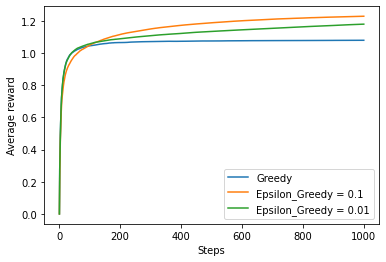

In [27]:
# Plot the average reward
############################
# YOUR CODE STARTS HERE
line1 = plt.plot([i for i in range(1,T+1)], greedy,label='Greedy')
line2 = plt.plot([i for i in range(1,T+1)], e_01,label='Epsilon_Greedy = 0.1')
line3 = plt.plot([i for i in range(1,T+1)], e_001,label='Epsilon_Greedy = 0.01')
plt.legend()
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.show()
# YOUR CODE ENDS HERE
############################

You should get curves similar to that in the book.